# 第5次实验实验报告
计算机系 计15 2021010803 郭高旭

## 实验目的
- 练习线性代数方程组的计算
- 掌握使用python求线性代数方程组的数值解
- 通过实例使用线性代数方程组模型解决简化的实际问题
- 对迭代法的收敛性和解的稳定性作初步分析

In [18]:
import numpy as np
import scipy.linalg as la
import scipy.sparse as sp
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)

## 第3题：迭代法

### 问题分析与算法设计

本题通过迭代法求解给定的方程组，认识迭代法的基本思想，掌握迭代法的基本原理和计算方法以及迭代初值和方程组系数矩阵性质对收敛速度的影响。
观察可知，A是严格对角占优的，所以两种迭代法理论上都是收敛的。但是，由于A的条件数较大，所以迭代法的收敛速度较慢。因此，需要选择合适的迭代初值，以加快迭代的收敛速度。

### 代码实现与结果
由于scipy中未找到jacobi和seidel迭代法的实现，所以我自己实现了这两种迭代法。

In [19]:
def jacobi_iteration(A, b, x0, tol=1e-6, max_iter=10000):
    n = len(b)
    x = x0.copy()
    x_new = np.zeros_like(x)
    converged = False
    for k in range(max_iter):
        for i in range(n):
            sigma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - sigma) / A[i, i]
        if np.linalg.norm(x_new - x) < tol:
            converged = True
            break
        x = x_new.copy()
    return x_new, k + 1, converged


def gauss_seidel_iteration(A, b, x0, tol=1e-6, max_iter=10000):
    n = len(b)
    x = x0.copy()
    x_last = x0.copy()
    converged = False
    for k in range(max_iter):
        for i in range(n):
            sigma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x[i] = (b[i] - sigma) / A[i, i]
        if np.linalg.norm(x - x_last) < tol:
            converged = True
            break
        x_last = x.copy()
    return x, k + 1, converged

下面的代码的数据集为
- b
  - [1, 1, 1 $ \cdots $ 1]
  - [1, 2, 3 $ \cdots $ 20]
  - random
- x0
  - [0, 0, 0 $ \cdots $ 0]
  - [1, 1, 1 $ \cdots $ 1]
  - random int
- func
    - jacobi
    - seidel

In [20]:
A = sp.diags(
    [-1 / 4, -1 / 2, 3, -1 / 2, -1 / 4], [-2, -1, 0, 1, 2], shape=(20, 20)
).toarray()
    
b_sets = {
    "ones": np.ones(20),
    "range": np.arange(1, 21),
    "random_float": np.random.rand(20),
}

x0_sets = {
    "zeros": np.zeros(20),
    "ones": np.ones(20),
    "random_float": np.random.rand(20),
}

func_sets = {
    "jacobi": jacobi_iteration,
    "gauss_seidel": gauss_seidel_iteration,
}

for b_name, b in b_sets.items():
    for x0_name, x0 in x0_sets.items():
        for func_name, func in func_sets.items():
            print(f"b: {b_name}, x0: {x0_name}, func: {func_name}")
            x, k, converged = func(A, b, x0, tol=1e-6, max_iter=10000)
            if converged:
                print(f"  converged in {k} iterations")
            else:
                print("  did not converge")
            print(f"  x = {x}\n")

b: ones, x0: zeros, func: jacobi
  converged in 21 iterations
  x = [0.4816 0.5734 0.6328 0.6521 0.6609 0.6643 0.6657 0.6663 0.6665 0.6666
 0.6666 0.6665 0.6663 0.6657 0.6643 0.6609 0.6521 0.6328 0.5734 0.4816]

b: ones, x0: zeros, func: gauss_seidel
  converged in 14 iterations
  x = [0.4816 0.5734 0.6328 0.6521 0.6609 0.6643 0.6657 0.6663 0.6665 0.6666
 0.6666 0.6665 0.6663 0.6657 0.6643 0.6609 0.6521 0.6328 0.5734 0.4816]

b: ones, x0: ones, func: jacobi
  converged in 20 iterations
  x = [0.4816 0.5734 0.6328 0.6521 0.6609 0.6643 0.6657 0.6663 0.6665 0.6666
 0.6666 0.6665 0.6663 0.6657 0.6643 0.6609 0.6521 0.6328 0.5734 0.4816]

b: ones, x0: ones, func: gauss_seidel
  converged in 14 iterations
  x = [0.4816 0.5734 0.6328 0.6521 0.6609 0.6643 0.6657 0.6663 0.6665 0.6666
 0.6666 0.6665 0.6663 0.6657 0.6643 0.6609 0.6521 0.6328 0.5734 0.4816]

b: ones, x0: random_float, func: jacobi
  converged in 20 iterations
  x = [0.4816 0.5734 0.6328 0.6521 0.6609 0.6643 0.6657 0.6663 0.6665 0.6

- 观察可知，A是严格对角占优的，所以两种迭代法理论上都是收敛的。各种结果也确实验证了这一点，基本上都在30次迭代内收敛。
- 每一种数据集都有两种迭代法的结果，可以看到，seidel迭代法的收敛速度要比jacobi迭代法快很多。

### 第2问
选择b为[1,2,3...20]，x0为[1,1,1...1]，使用jacobi迭代法，迭代30次后的结果为

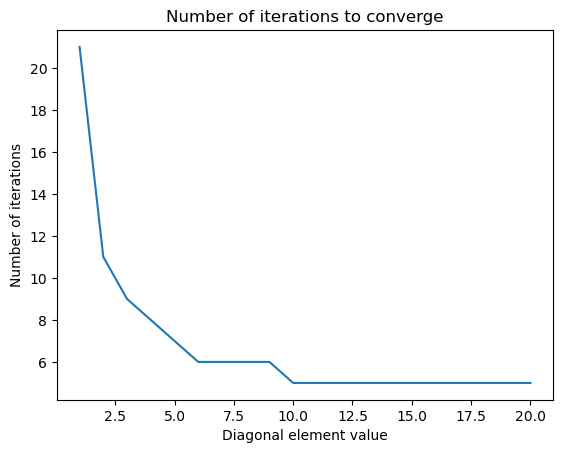

In [21]:
b= range(1, 21)
x0 = np.zeros(20)
func = jacobi_iteration

k_list = []
for i in range(1, 21):
    A = sp.diags(
        [-1 / 4, -1 / 2, 3*i, -1 / 2, -1 / 4], [-2, -1, 0, 1, 2], shape=(20, 20)
    ).toarray()
    x, k, converged = func(A, b, x0, tol=1e-5, max_iter=10000)
    k_list.append(k)
    
plt.plot(range(1, 21), k_list)
plt.xlabel("Diagonal element value")
plt.ylabel("Number of iterations")
plt.title("Number of iterations to converge")
plt.show()


### 结果分析

随着主对角元素的增加，迭代次数在减少，收敛速度变快


### 结论

系数矩阵的“对角占优程度”越大，迭代法的收敛速度越快。


## 第5题：投入产出
### 问题分析与模型建立
在技术水平没有明显提高的情况下，认为直接消耗系数不变，可得到直接消耗系数矩阵`[[0.15,0.1,0.2],[0.3,0.05,0.3],[0.2,0.3,0]]`  
设第i个部门的总产出为$x_i$,其中对第j个部门的投入为$x_{ij}$,外部需求为$d_i$,则有$x_i=\sum_{j=1}^{n}x_{ij}+d_i,\quad i=1,2,3$,又直接消耗系数$a_{ij}=\frac {x_{ij}}{x_i}$,则有$x_{ij}=a_{ij}x_i$,以及各部门总产出等于总投入所以有$x_i=\sum_{j=1}^{n}a_{ij}x_i+d_i$,整理得$(I-A)x=d$,其中$I$为单位矩阵，$d$为外部需求向量。
- 第一问
  实际上就是给定d，求解x，即求解线性方程组$(I-A)x=d$
- 第二问
  从$(I-A)x=d$中可得，x的解为$x=(I-A)^{-1}d$，所以当d增加1个单位时，x的增加量为$(I-A)^{-1}$

### 代码实现与结果


In [22]:
A = np.array(([0.15, 0.1, 0.2], [0.3, 0.05, 0.3], [0.2, 0.3, 0]))
d = np.array([50,150,100])
res= np.linalg.solve(np.eye(3) - A, d)
print("solution of q1")
res

solution of q1


array([139.2801, 267.6056, 208.1377])

In [23]:
print("solution of q2")
la.inv(np.eye(3) - A)

solution of q2


array([[1.3459, 0.2504, 0.3443],
       [0.5634, 1.2676, 0.493 ],
       [0.4382, 0.4304, 1.2167]])

### 结果分析与结论
- 第一问
  通过计算可得，当外部需求为[50,150,100]时，三个部门的产出分别为[139.2801, 267.6056, 208.1377]（亿元）
- 第二问
  - 如果对农业的外部需求增加一个单位，那么三个部门产出分别增加[1.3459,0.5008,0.5164]个单位
  - 如果对制造业业的外部需求增加一个单位，那么三个部门产出分别增加[0.2817, 1.2676, 0.3697]个单位
  - 如果对服务业的外部需求增加一个单位，那么三个部门产出分别增加[0.2921, 0.5738, 1.2167]个单位

## 第8题：钢架结构

### 问题分析与模型建立

对三个点水平数值方向进行受力分析，得到下面的方程组
$$
\begin{cases}
    0.866F_3+0.5F_1=F\\
    0.866F_1-0.5F_3=0 \quad (1)\\
    0.5F_1 -V_2=0\\
    0.866F_-F_2-H_2=0 \quad (2)\\
    0.5F_3-F_2=0\\
    0.866F_3-V_3=0 \quad (3)\\
\end{cases}
$$

得到相应的线性方程组
$$
\begin{bmatrix}
0.5 & 0 & 0.866 & 0 & 0 & 0 \\
0.866 & 0 & -0.5 & 0 & 0 & 0 \\
0.5 & 0 & -1 & 0 & 0 & 0 \\
0.866 & -1 & 0 & -1 & 0 & 0 \\
0 & -1 & 0.5 & 0 & 0 & 0 \\
0 & 0 & 0.866 & 0 & 0 & -1 \\
\end{bmatrix}
\begin{bmatrix}
F_1 \\
F_2 \\
F_3 \\
H \\
V_1 \\
V_2 \\
\end{bmatrix}
=
\begin{bmatrix}
100 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix}
$$


### 代码实现与结果

In [24]:
A = np.array(
    (
        [0.5, 0, 0.866, 0, 0, 0],
        [0.866, 0, -0.5, 0, 0, 0],
        [0.5, 0, 0, 0, -1, 0],
        [0.866, -1, 0, -1, 0, 0],
        [0, -1, 0.5, 0, 0, 0],
        [0, 0, 0.866, 0, 0, -1],
    )
)
b = np.array([100,0,0,0,0,0])
print("solution of q1")
np.linalg.solve(A, b)

solution of q1


array([50.0022, 43.3019, 86.6038, -0.    , 25.0011, 74.9989])

In [25]:
delta=[1,0,0,0,0,0]
la.inv(A).dot(delta)

array([ 0.5  ,  0.433,  0.866, -0.   ,  0.25 ,  0.75 ])

### 结果分析
- 外力F为100kg时各个力的大小为$F_1=50kg,F_2=43.3kg,F_3=86.6kg,H=0kg,V_2=25kg,V_3=75kg$
- 外力变化1kg时，各个力变化大小为$F_1=0.5kg,F_2=0.433kg,F_3=0.866kg,H=0kg,V_2=0.25kg,V_3=0.75kg$
